In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
print("Done.")

# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

Done.


In [2]:
# This function is to plot the confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])


In [3]:
# Load the dataset from (dataset_part_2.csv)
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

In [4]:
data.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

In [5]:
data.shape

(90, 18)

In [6]:
list(data.columns)

['FlightNumber',
 'Date',
 'BoosterVersion',
 'PayloadMass',
 'Orbit',
 'LaunchSite',
 'Outcome',
 'Flights',
 'GridFins',
 'Reused',
 'Legs',
 'LandingPad',
 'Block',
 'ReusedCount',
 'Serial',
 'Longitude',
 'Latitude',
 'Class']

In [7]:

# Load the dataset from (dataset_part_3.csv)
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [8]:
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [9]:
X.shape

(90, 83)

In [10]:
list(X.columns)

['FlightNumber',
 'PayloadMass',
 'Flights',
 'Block',
 'ReusedCount',
 'Orbit_ES-L1',
 'Orbit_GEO',
 'Orbit_GTO',
 'Orbit_HEO',
 'Orbit_ISS',
 'Orbit_LEO',
 'Orbit_MEO',
 'Orbit_PO',
 'Orbit_SO',
 'Orbit_SSO',
 'Orbit_VLEO',
 'LaunchSite_CCAFS SLC 40',
 'LaunchSite_KSC LC 39A',
 'LaunchSite_VAFB SLC 4E',
 'LandingPad_5e9e3032383ecb267a34e7c7',
 'LandingPad_5e9e3032383ecb554034e7c9',
 'LandingPad_5e9e3032383ecb6bb234e7ca',
 'LandingPad_5e9e3032383ecb761634e7cb',
 'LandingPad_5e9e3033383ecbb9e534e7cc',
 'Serial_B0003',
 'Serial_B0005',
 'Serial_B0007',
 'Serial_B1003',
 'Serial_B1004',
 'Serial_B1005',
 'Serial_B1006',
 'Serial_B1007',
 'Serial_B1008',
 'Serial_B1010',
 'Serial_B1011',
 'Serial_B1012',
 'Serial_B1013',
 'Serial_B1015',
 'Serial_B1016',
 'Serial_B1017',
 'Serial_B1018',
 'Serial_B1019',
 'Serial_B1020',
 'Serial_B1021',
 'Serial_B1022',
 'Serial_B1023',
 'Serial_B1025',
 'Serial_B1026',
 'Serial_B1028',
 'Serial_B1029',
 'Serial_B1030',
 'Serial_B1031',
 'Serial_B1032',


In [11]:
# Dependent Variable
Y = data['Class'].to_numpy()
type(Y)

numpy.ndarray

In [12]:
Y.shape

(90,)

In [13]:
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [14]:
# Normalize dataset
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:1]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

In [15]:
# Split the data into Training and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(f'X_train: {X_train.shape}  Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}  Y_test: {Y_test.shape}')

X_train: (72, 83)  Y_train: (72,)
X_test: (18, 83)  Y_test: (18,)


In [16]:
#Logistic Regression

# Set parameters, create model, perform GridSearchCV to identify the best parameters, and train model on training data.
parameters_lr = {"C":[0.01,0.1,1],
                 'penalty':['l2'],
                 'solver':['lbfgs']}  # l1 lasso l2 ridge

lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters_lr, cv=5)
logreg_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters): ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)

Tuned Hyperparameters (Best Parameters):  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy:  0.8342857142857143


In [17]:
# Calculate Score
logistic_regression_score = logreg_cv.score(X_test, Y_test)
logistic_regression_score

0.8333333333333334

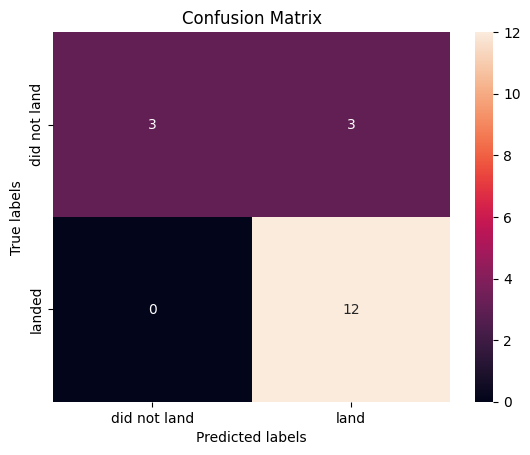

In [18]:
# Plot Confusion Matrix
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)
plt.show()

In [19]:
#Support Vector Machine (SVM)
# Set parameters, create model, perform GridSearchCV to identify the best parameters, and train model on training data.
parameters_svm = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters_svm, cv=5)
svm_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters): ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

Tuned Hyperparameters (Best Parameters):  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy:  0.8342857142857142


In [20]:
# Calculate Score
svm_score = svm_cv.score(X_test, Y_test)
svm_score

0.8333333333333334

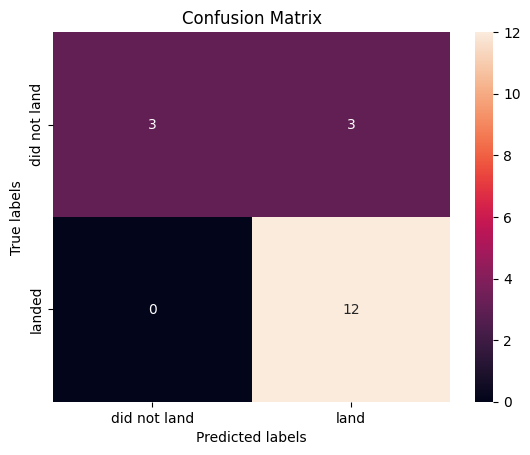

In [21]:
# Plot Confusion Matrix
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)
plt.show()

In [22]:
# Decision Tree
# Set parameters, create model, perform GridSearchCV to identify the best parameters, and train model on training data.
parameters_tree = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters_tree, cv=5)
tree_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters): ", tree_cv.best_params_)
print("Accuracy: ", tree_cv.best_score_)

Tuned Hyperparameters (Best Parameters):  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy:  0.9028571428571428


In [23]:
# Calculate Score
decision_tree_score = tree_cv.score(X_test, Y_test)
decision_tree_score

0.7777777777777778

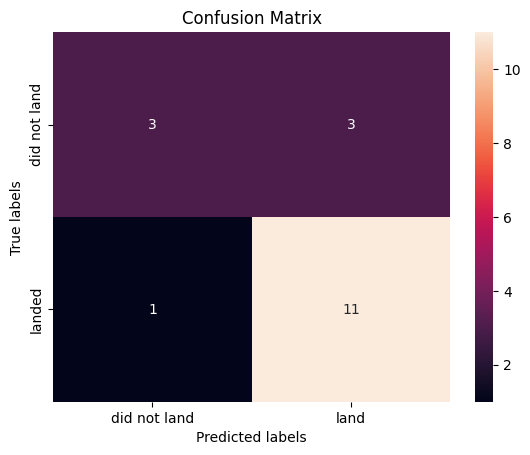

In [24]:
# Plot Confusion Matrix
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)
plt.show()

In [25]:
# K-Nearest Neighbors (KNN)
# Set parameters, create model, perform GridSearchCV to identify the best parameters, and train model on training data.
parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters_knn, cv=5)
knn_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters (Best Parameters): ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)

Tuned Hyperparameters (Best Parameters):  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Accuracy:  0.8609523809523811


In [26]:
# Calculate Score
knn_score = knn_cv.score(X_test, Y_test)
knn_score

0.8333333333333334

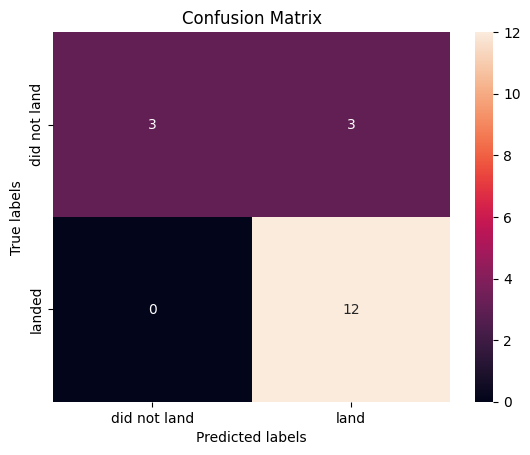

In [27]:
# Plot Confusion Matrix
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)
plt.show()

In [28]:
# Compile model scores into a DataFrame and then identify and label the maximum score
ranking_dict = {'Model':['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'], 'Score':[logistic_regression_score, svm_score, decision_tree_score, knn_score]}
ranking_df = pd.DataFrame(ranking_dict)

def assign_status(score):
    if score == ranking_df['Score'].max():
        return 'Max Score'
    else:
        return '0'

ranking_df['Max Score'] = ranking_df['Score'].apply(assign_status)
ranking_df

,Model,Score,Max Score
0,Logistic Regression,0.833333,Max Score
1,SVM,0.833333,Max Score
2,Decision Tree,0.777778,0
3,KNN,0.833333,Max Score


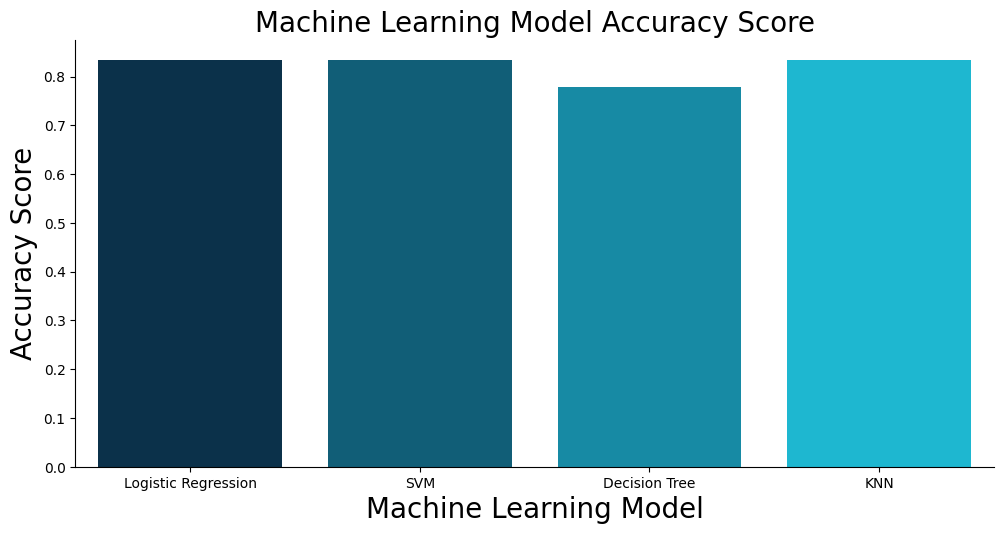

In [29]:
# Plot the model accuracy on a bar chart
colors_dict = {'Logistic Regression':'#003355', 'SVM':'#006688', 'Decision Tree':'#0099bb', 'KNN':'#00ccee'}
sns.catplot(kind="bar", data=ranking_df, x="Model", y="Score", aspect=2, palette=colors_dict)
plt.xlabel("Machine Learning Model", fontsize=20)
plt.ylabel("Accuracy Score", fontsize=20)
plt.title("Machine Learning Model Accuracy Score", fontsize=20)
plt.show()